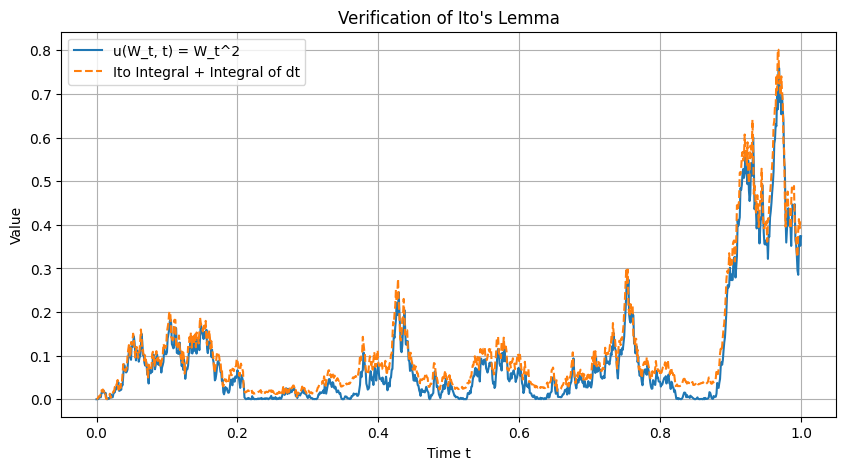

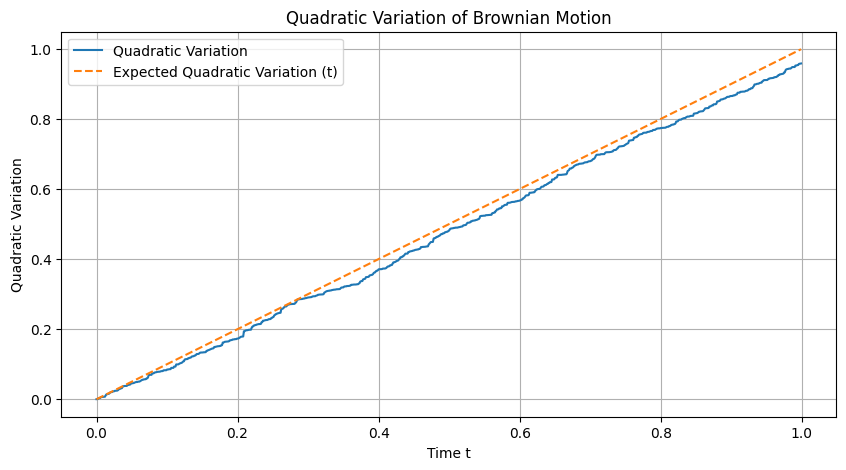

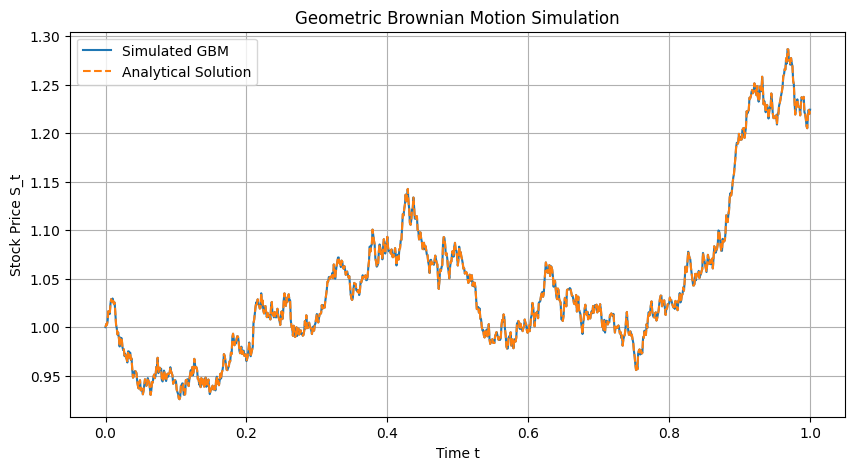

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_ito_lemma_and_gbm(T=1, N=1000, mu=0.1, sigma=0.2, S0=1, seed=42):
    np.random.seed(seed)
    dt = T / N
    t = np.linspace(0, T, N+1)
    W = np.zeros(N+1)
    dW = np.sqrt(dt) * np.random.randn(N)  
    W[1:] = np.cumsum(dW)
    
    u_exact = W**2  # u(X_t, t) = X_t^2
    
    ito_integral = np.cumsum(2 * W[:-1] * dW) 
    rhs = ito_integral + np.arange(N) * dt  
    
    # Quadratic variation check
    quad_var = np.cumsum(dW**2)
    expected_quad_var = t[:-1] 
    
    # Simulating Geometric Brownian Motion (GBM)
    S = np.zeros(N+1)
    S[0] = S0
    for i in range(N):
        S[i+1] = S[i] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW[i])
    
    # Analytical GBM Solution
    S_exact = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
    
    plt.figure(figsize=(10, 5))
    plt.plot(t, u_exact, label='u(W_t, t) = W_t^2')
    plt.plot(t[:-1], rhs, '--', label='Ito Integral + Integral of dt')
    plt.xlabel('Time t')
    plt.ylabel('Value')
    plt.title("Verification of Ito's Lemma")
    plt.legend()
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(10, 5))
    plt.plot(t[:-1], quad_var, label='Quadratic Variation')
    plt.plot(t[:-1], expected_quad_var, '--', label='Expected Quadratic Variation (t)')
    plt.xlabel('Time t')
    plt.ylabel('Quadratic Variation')
    plt.title("Quadratic Variation of Brownian Motion")
    plt.legend()
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(10, 5))
    plt.plot(t, S, label='Simulated GBM')
    plt.plot(t, S_exact, '--', label='Analytical Solution')
    plt.xlabel('Time t')
    plt.ylabel('Stock Price S_t')
    plt.title("Geometric Brownian Motion Simulation")
    plt.legend()
    plt.grid()
    plt.show()

simulate_ito_lemma_and_gbm()
